# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.isna().sum()


df["AVG_MATH_8_SCORE"] = df["AVG_MATH_8_SCORE"].fillna(df["AVG_MATH_8_SCORE"].mean())
df["AVG_MATH_4_SCORE"] = df["AVG_MATH_4_SCORE"].fillna(df["AVG_MATH_4_SCORE"].mean())


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [5]:
# @@@ 1
# Your Code
years = df.groupby("YEAR")
print(df["YEAR"].nunique())

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [6]:
# @@@ 2
df = df.set_index("STATE")
print(df.loc["MICHIGAN"]["AVG_MATH_8_SCORE"].mean())
print(df.loc["OHIO"]["AVG_MATH_8_SCORE"].mean())

277.51198026779423
279.7241014799155


Find the average for your chosen test across all states in 2019

In [7]:
# @@@ 3
year2019 = years.get_group(2019)
year2019["AVG_MATH_8_SCORE"].mean()

np.float64(281.2641509433962)

For each state, find a maximum value for your chosen test score

In [8]:
# @@@ 4
states = df.groupby("STATE")
states["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 278.280731
ALASKA                  283.000000
ARIZONA                 283.000000
ARKANSAS                279.000000
CALIFORNIA              278.280731
COLORADO                292.000000
CONNECTICUT             289.000000
DELAWARE                284.000000
DISTRICT_OF_COLUMBIA    278.280731
DODEA                   293.000000
FLORIDA                 281.000000
GEORGIA                 281.000000
HAWAII                  281.000000
IDAHO                   287.000000
ILLINOIS                285.000000
INDIANA                 288.000000
IOWA                    286.000000
KANSAS                  290.000000
KENTUCKY                282.000000
LOUISIANA               278.280731
MAINE                   289.000000
MARYLAND                288.000000
MASSACHUSETTS           301.000000
MICHIGAN                280.000000
MINNESOTA               295.000000
MISSISSIPPI             278.280731
MISSOURI                286.000000
MONTANA                 293.000000
NATIONAL      

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [27]:
# @@@ 5
df['TOTAL_REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL_ALL']
df["TOTAL_REVENUE_PER_STUDENT"] = df["TOTAL_REVENUE_PER_STUDENT"].fillna(df["TOTAL_REVENUE_PER_STUDENT"].median())
df.head()

,PRIMARY_KEY,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,TOTAL_REVENUE_PER_STUDENT
STATE,,,,,,,,,,,,,,,,,,,,,
ALABAMA,1992_ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.000000,252.000000,207.0,NaN,3.661510
ALASKA,1992_ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,...,8789.0,6714.0,NaN,NaN,122487.0,236.327434,278.280731,NaN,NaN,8.568999
ARIZONA,1992_ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.000000,265.000000,209.0,NaN,4.837699
ARKANSAS,1992_ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.000000,256.000000,211.0,NaN,3.877685
CALIFORNIA,1992_CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.000000,261.000000,202.0,NaN,4.997299


Feature engineering justification: Bigger states, like California, will generally have greater total revenue than smaller states, so in order to account for that, we can compute a new column where we divide the revenue by the total number of students, so that we have a metric that can be used to fairly compare big and small states to each other.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

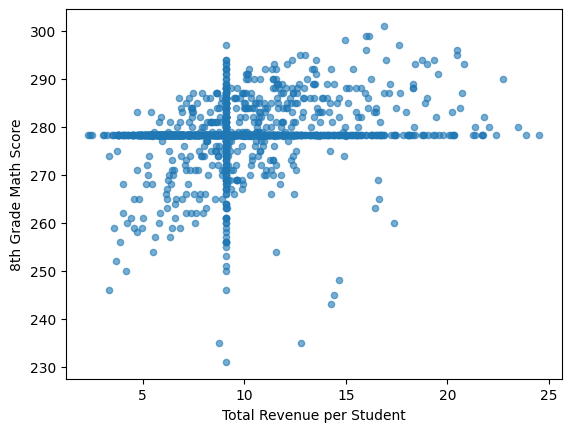

In [28]:
# @@@ 6
df.plot.scatter(x='TOTAL_REVENUE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Total Revenue per Student')
plt.ylabel('8th Grade Math Score')

There seems to be some correlation between total revenue per student and 8th grade math score, but it is not very strong.

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

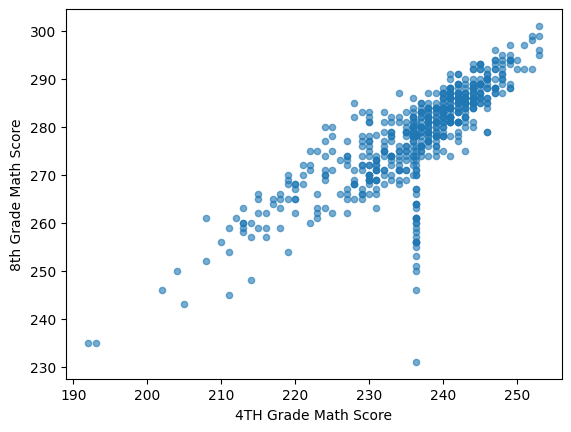

In [29]:
# @@@ 7
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('4TH Grade Math Score')
plt.ylabel('8th Grade Math Score')

There seems to be a very strong correlation between 4th grade math and 8th grade math scores.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# @@@ 8

X = df[['TOTAL_REVENUE_PER_STUDENT','AVG_MATH_4_SCORE']]
y = df["AVG_MATH_8_SCORE"]

In [33]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [34]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [35]:
# @@@ 11
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [37]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [41]:
# @@@ 12
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
np.mean((model.predict(X_test)-y_test)**2)**0.5

0.6241488563722508
-0.19422770619218743
1.4119018702963346


np.float64(3.7915919579199757)

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

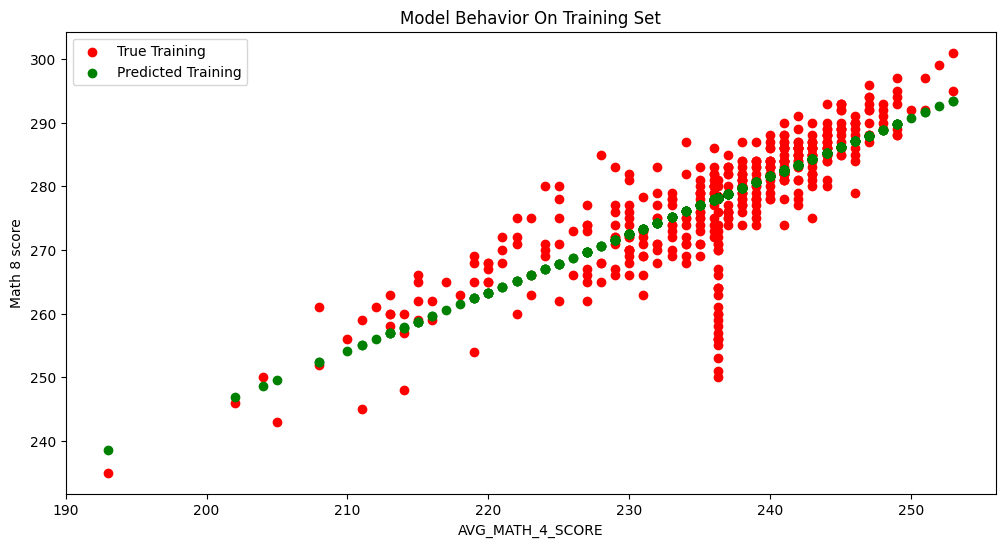

In [43]:
# @@@ 13

col_name = 'AVG_MATH_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

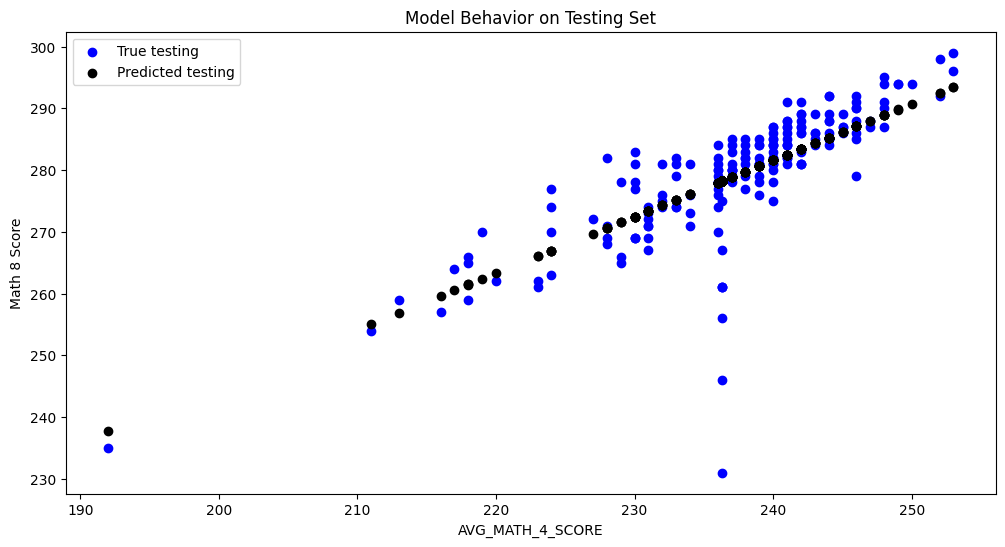

In [44]:
# @@@ 14


col_name = "AVG_MATH_4_SCORE"


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")